Steps
- Load MNIST
- Use Data Loaders and Transform
- Multi Layer Neural Network, Activation Function
- Loss and Optimizer
- Training and Loop
- Model Evaluation
- Gpu support

In [1]:
import torch
import torchvision
import torch.nn as nn
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [2]:
#device config
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [3]:
#hyperparameters
input_size=784 #28x28
hidden_size=100
num_classes=10
num_epochs=2
batch_size=100
learning_rate=0.001 

In [4]:
#MNIST
train_dataset=torchvision.datasets.MNIST(root='./data',
    train=True,
    transform=transforms.ToTensor(),
    download=True)
test_dataset=torchvision.datasets.MNIST(root='./data',
    train=False,
    transform=transforms.ToTensor())

train_loader=torch.utils.data.DataLoader(dataset=train_dataset,
    batch_size=batch_size,
    shuffle=True)
test_loader=torch.utils.data.DataLoader(dataset=test_dataset,
    batch_size=batch_size,
    shuffle=False)

for features,labels in train_loader:
    print(features.shape)
    print(labels.shape)
    break

torch.Size([100, 1, 28, 28])
torch.Size([100])


100 - Batch size or number of samples in a batch<br>
1 - the images contain only one channel<br>
28x28- is the size of the image

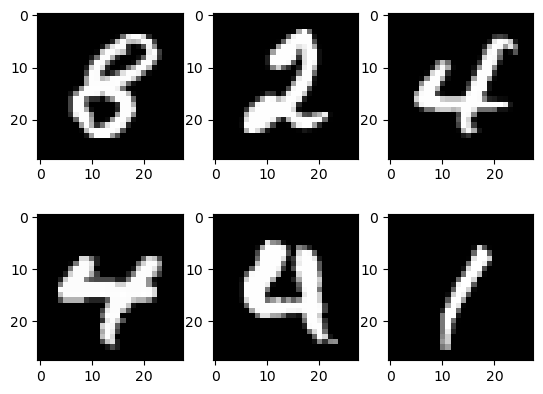

In [5]:
# Let's visualize images
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(features[i][0],cmap='gray')

In [6]:
class NeuralNet(nn.Module):
    def __init__(self,input_size,hidden_size,num_classes):
        super(NeuralNet,self).__init__()
        self.l1=nn.Linear(input_size,hidden_size)
        self.relu=nn.ReLU()
        self.l2=nn.Linear(hidden_size,num_classes)
    def forward(self,x):
        out=self.l1(x)
        out=self.relu(out)
        out=self.l2(out)
        return out
model=NeuralNet(input_size,hidden_size,num_classes).to(device)



In [7]:
# loss and optimizer
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)


In [10]:
#training loop
for epoch in range(num_epochs):
    for batch_idx, (images, labels) in enumerate(train_loader):
        #get samples
        # 100 1 28`28
        # 100 784
        data = images.reshape(-1,28*28).to(device=device)
        targets=labels.to(device=device)

        #forward
        scores=model(data)
        loss=loss_function(scores,targets)

        #backward
        optimizer.zero_grad()
        loss.backward()

        #gradient descent or adam step
        optimizer.step()
        
        if (batch_idx+1) % 100 == 0:
            print(f'epoch {epoch+1} batch {batch_idx+1} loss = {loss.item():.4f}')
        
        

epoch 1 batch 100 loss = 0.1362
epoch 1 batch 200 loss = 0.1756
epoch 1 batch 300 loss = 0.1321
epoch 1 batch 400 loss = 0.2124
epoch 1 batch 500 loss = 0.1264
epoch 1 batch 600 loss = 0.1941
epoch 2 batch 100 loss = 0.1640
epoch 2 batch 200 loss = 0.1600
epoch 2 batch 300 loss = 0.0719
epoch 2 batch 400 loss = 0.0947
epoch 2 batch 500 loss = 0.0725
epoch 2 batch 600 loss = 0.0295


In [9]:
#test

with torch.no_grad():
    n_correct=0
    n_samples=0
    for images,labels in test_loader:
        images=images.reshape(-1,28*28).to(device=device)
        labels=labels.to(device=device)
        outputs=model(images)
        #max returns (value,index)
        _,predictions=torch.max(outputs,1)
        n_samples+=labels.shape[0]
        n_correct+=(predictions==labels).sum().item()
    acc=n_correct/n_samples
    print(f'accuracy = {acc:.4f}')

accuracy = 0.9515
